# || The Sparks Foundation || GRIPJAN21  
## NAME: Gaurav Singh
### Task 1 : Object Detection / Optical Character Recognition (OCR)

## Object Detection and Recognition

In [488]:
# import libaries
import cv2
import os
import matplotlib.pyplot as plt

In [489]:
# Threshold to detect object
thres = 0.45 

In [490]:
#Labels
classNames= []
classFile = 'E:\mine\Computer Vision\OpenCv\Object Detection\Object_Detection_files\coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [491]:
classNames

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [492]:
#load model from disk
configPath = 'E:\\mine\\Computer Vision\\OpenCv\\Object Detection\\Object_Detection_files\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'E:\\mine\\Computer Vision\\OpenCv\\Object Detection\\Object_Detection_files\\frozen_inference_graph.pb'

#load the example image
image="C:\\Users\\gaurav\\Downloads\\car.jpg"

In [493]:
#define model
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 000001654577E240>

In [494]:
img = cv2.imread(image)
classIds, confs, bbox = net.detect(img,confThreshold=thres)
print(classIds,bbox)

[[3]] [[  4  18 290 111]]


In [495]:
if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        # draw the bounding box on the image
        cv2.rectangle(img,box,color=(0,255,0),thickness=2)
        cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

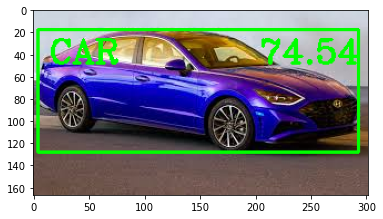

In [496]:
#show result
plt.imshow(img)

## Method - 1 : Character Recognition using Pytesseract 

In [497]:
# Importing all the Libraries

import cv2
import numpy as np
import pytesseract 
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression
# The path to tesseract we have installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [498]:
# load the example image and convert it to grayscale
image="C:\\Users\\gaurav\\Downloads\\text.png"
image = cv2.imread(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


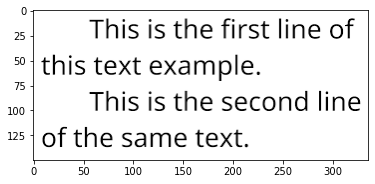

In [499]:
plt.imshow(image)

In [500]:
text = pytesseract.image_to_string(image)
print(text)

This is the first line of
this text example.

This is the second line
of the same text.



## Method - 2 : Character Detection using Deep Learning and Opencv

In [501]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import time
import cv2

In [502]:
image="C:\\Users\\gaurav\\Downloads\\text4.jpg"
min_confidence=0.3
width=320
height=320
east="E:/mine/Computer Vision/OpenCv/OCR/opencv-text-detection/frozen_east_text_detection.pb"

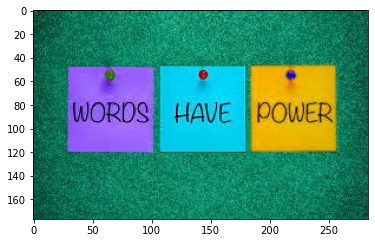

In [503]:
# load the input image and grab the image dimensions
image = cv2.imread(image)
plt.imshow(image)

In [504]:
orig = image.copy()
(H, W) = image.shape[:2]

In [505]:
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (width, height)
rW = W / float(newW)
rH = H / float(newH)

In [506]:
# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [507]:
# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

In [508]:
# load the pre-trained EAST text detector
print("loading EAST text detector...")
net = cv2.dnn.readNet(east)

loading EAST text detector...


In [509]:
# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

In [510]:
# show timing information on text prediction
print("text detection took {:.6f} seconds".format(end - start))

# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

text detection took 3.587712 seconds


In [511]:
# loop over the number of rows
for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

    # loop over the number of columns
    for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < min_confidence:
            continue
        
        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)
        
        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)
        
        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]
        
        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)
        
        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

In [512]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [513]:
# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    
    # draw the bounding box on the image
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

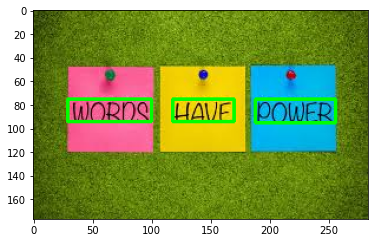

In [514]:
# show the output image
#cv2.imshow("Text Detection", orig)
#cv2.waitKey(0)

#cv2.destroyAllWindows()
orig=cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(orig)

# Method - 3 : Character Recognition using Deep learning and Opencv

In [515]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import cv2
import pytesseract
# The path to tesseract we have installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [516]:
def decode_predictions(scores, geometry):
    # grab the number of rows and columns from the scores volume, then
    # initialize our set of bounding box rectangles and corresponding
    # confidence scores
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the
        # geometrical data used to derive potential bounding box
        # coordinates that surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
        
        # loop over the number of columns
        for x in range(0, numCols):
            # if our score does not have sufficient probability,
            # ignore it
            if scoresData[x] < min_confidence:
                continue
                
            # compute the offset factor as our resulting feature
            # maps will be 4x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            
            # extract the rotation angle for the prediction and
            # then compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            
            # use the geometry volume to derive the width and height
            # of the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            
            # compute both the starting and ending (x, y)-coordinates
            # for the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            
            # add the bounding box coordinates and probability score
            # to our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])
            
    # return a tuple of the bounding boxes and associated confidences
    return (rects, confidences)

In [517]:
image="C:\\Users\\gaurav\\Downloads\\text3.jpg"
east="E:/mine/Computer Vision/OpenCv/OCR/opencv-text-recognition/frozen_east_text_detection.pb"
min_confidence=0.5
width=320
height=320
padding=0.3

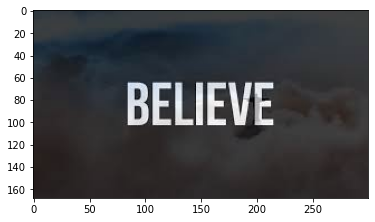

In [518]:
# load the input image and grab the image dimensions
image = cv2.imread(image)
plt.imshow(image)

In [519]:
orig = image.copy()
(origH, origW) = image.shape[:2]

In [520]:
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (width, height)
rW = origW / float(newW)
rH = origH / float(newH)

In [521]:
# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [522]:
# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

In [523]:
# load the pre-trained EAST text detector
print("loading EAST text detector...")
net = cv2.dnn.readNet(east)

loading EAST text detector...


In [524]:
# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)

In [525]:
# decode the predictions, then  apply non-maxima suppression to
# suppress weak, overlapping bounding boxes
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [526]:
# initialize the list of results
results = []

In [527]:
# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    
    # in order to obtain a better OCR of the text we can potentially
    # apply a bit of padding surrounding the bounding box -- here we
    # are computing the deltas in both the x and y directions
    dX = int((endX - startX) * padding)
    dY = int((endY - startY) * padding)
    
    # apply padding to each side of the bounding box, respectively
    startX = max(0, startX - dX)
    startY = max(0, startY - dY)
    endX = min(origW, endX + (dX * 2))
    endY = min(origH, endY + (dY * 2))
    
    # extract the actual padded ROI
    roi = orig[startY:endY, startX:endX]
    
    # in order to apply Tesseract v4 to OCR text we must supply
    # (1) a language, (2) an OEM flag of 4, indicating that the we
    # wish to use the LSTM neural net model for OCR, and finally
    # (3) an OEM value, in this case, 7 which implies that we are
    # treating the ROI as a single line of text
    config = ("-l eng --oem 1 --psm 7")
    text = pytesseract.image_to_string(roi, config=config)
    
    # add the bounding box coordinates and OCR'd text to the list
    # of results
    results.append(((startX, startY, endX, endY), text))

# sort the results bounding box coordinates from top to bottom
results = sorted(results, key=lambda r:r[0][1])

In [528]:
# loop over the results
for ((startX, startY, endX, endY), text) in results:
    # display the text OCR'd by Tesseract
    print("OCR TEXT")
    print("========")
    print("{}\n".format(text))
    
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV, then draw the text and a bounding box surrounding
    # the text region of the input image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    output = orig.copy()
    cv2.rectangle(output, (startX, startY), (endX, endY),
                  (0, 0, 255), 2)
    cv2.putText(output, text, (startX, startY - 18),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 2)
    
    # show the output image
    #cv2.imshow("Text Detection", output)
    #cv2.waitKey(0)
    
#cv2.destroyAllWindows()

OCR TEXT
BELIEVE




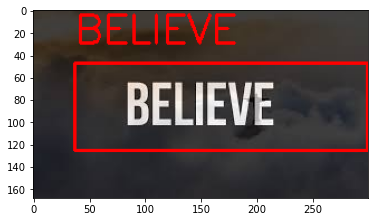

In [529]:
output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)

# Thank You